# Sujet 6 : Autour du Paradoxe de Simpson

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"

In [3]:
data_file = "Subject6_smoking.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
data = pd.read_csv(data_url)
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [5]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

### 1. Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

In [6]:
data_crosstab=pd.crosstab(data['Status'],data['Smoker'])
data_crosstab

Smoker   No  Yes
Status          
Alive   502  443
Dead    230  139

In [7]:
mortality_smoker=data_crosstab['Yes']/data_crosstab['Yes'].sum()*100
print("Mortality of smokers is (%):",mortality_smoker['Dead'])

Mortality of smokers is (%): 23.883161512027492


In [8]:
mortality_nosmoker=data_crosstab['No']/data_crosstab['No'].sum()*100
print("Mortality of no smokers is (%) :",mortality_nosmoker['Dead'])

Mortality of no smokers is (%) : 31.420765027322407


In [9]:
mortality=(mortality_smoker,mortality_nosmoker)

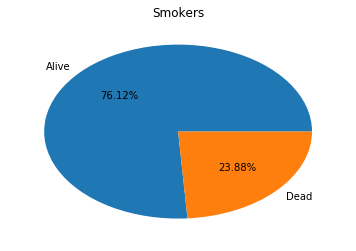

In [10]:
plt.pie(data_crosstab['Yes'], labels=['Alive','Dead'],autopct='%1.2f%%')
plt.title('Smokers')
plt.show()

In [11]:
z_score = 1.96
n_yes=443+139
se_smoker = np.sqrt(mortality_smoker['Dead'] * (100 - mortality_smoker['Dead'])/n_yes)
lsmoker = mortality_smoker['Dead'] - z_score* se_smoker #lower limit of the CI
usmoker = mortality_smoker['Dead'] + z_score* se_smoker #upper limit of the CI
CIsmoker = (lsmoker,usmoker)
print ("Confidence interval for mortality of smokers is (%) :",CIsmoker)

Confidence interval for mortality of smokers is (%) : (20.419137788669218, 27.347185235385766)


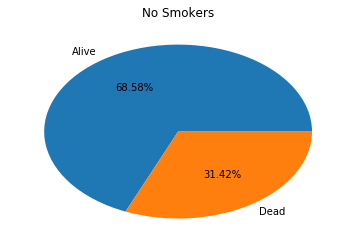

In [12]:
plt.pie(data_crosstab['No'],labels=['Alive','Dead'],autopct='%1.2f%%')
plt.title('No Smokers')
plt.show()

In [13]:
n_no=502+230
se_nosmoker = np.sqrt(mortality_nosmoker['Dead'] * (100 - mortality_nosmoker['Dead'])/n_no)
lnosmoker = mortality_nosmoker['Dead'] - z_score* se_nosmoker #lower limit of the CI
unosmoker = mortality_smoker['Dead'] + z_score* se_nosmoker #upper limit of the CI
CInosmoker = (lnosmoker,unosmoker)
print ("Confidence interval for mortality of no smokers is (%) :",CInosmoker)

Confidence interval for mortality of no smokers is (%) : (28.057932601982447, 27.24599393736745)


__The mortality is higher in no smokers group than in smokers group, but this rate of no smoker mortality is not included in its confidence interval.__ 

### 2. Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

In [14]:
bins= [17,34,54,64,100]
labels = ['18-34','35-54','55-64','>65']
data['AgeGroup']=pd.cut(data['Age'], bins=bins, labels=labels,)
data

Smoker Status   Age AgeGroup
0       Yes  Alive  21.0    18-34
1       Yes  Alive  19.3    18-34
2        No   Dead  57.5    55-64
3        No  Alive  47.1    35-54
4       Yes  Alive  81.4      >65
5        No  Alive  36.8    35-54
6        No  Alive  23.8    18-34
7       Yes   Dead  57.5    55-64
8       Yes  Alive  24.8    18-34
9       Yes  Alive  49.5    35-54
10      Yes  Alive  30.0    18-34
11       No   Dead  66.0      >65
12      Yes  Alive  49.2    35-54
13       No  Alive  58.4    55-64
14       No   Dead  60.6    55-64
15       No  Alive  25.1    18-34
16       No  Alive  43.5    35-54
17       No  Alive  27.1    18-34
18       No  Alive  58.3    55-64
19      Yes  Alive  65.7      >65
20       No   Dead  73.2      >65
21      Yes  Alive  38.3    35-54
22       No  Alive  33.4    18-34
23      Yes   Dead  62.3    55-64
24       No  Alive  18.0    18-34
25       No  Alive  56.2    55-64
26      Yes  Alive  59.2    55-64
27       No  Alive  25.8    18-34
28       No   Dead  36.9    35-54
29       No  Alive  20.2    18-34
...     ...    ...   ...      ...
1284    Yes   Dead  36.0    35-54
1285    Yes  Alive  48.3    35-54
1286     No  Alive  63.1    55-64
1287     No  Alive  60.8    55-64
1288    Yes   Dead  39.3    35-54
1289     No  Alive  36.7    35-54
1290     No  Alive  63.8    55-64
1291     No   Dead  71.3      >65
1292     No  Alive  57.7    55-64
1293     No  Alive  63.2    55-64
1294     No  Alive  46.6    35-54
1295    Yes   Dead  82.4      >65
1296    Yes  Alive  38.3    35-54
1297    Yes  Alive  32.7    18-34
1298     No  Alive  39.7    35-54
1299    Yes   Dead  60.0    55-64
1300     No   Dead  71.0      >65
1301     No  Alive  20.5    18-34
1302     No  Alive  44.4    35-54
1303    Yes  Alive  31.2    18-34
1304    Yes  Alive  47.8    35-54
1305    Yes  Alive  60.9    55-64
1306     No   Dead  61.4    55-64
1307    Yes  Alive  43.0    35-54
1308     No  Alive  42.1    35-54
1309    Yes  Alive  35.9    35-54
1310     No  Alive  22.3    18-34
1311    Yes   Dead  62.1    55-64
1312     No   Dead  88.6      >65
1313     No  Alive  39.1    35-54

[1314 rows x 4 columns]

In [15]:
data_cross_age=pd.crosstab(data['AgeGroup'], [data['Smoker'],data['Status']])
data_cross_age

Smoker      No        Yes     
Status   Alive Dead Alive Dead
AgeGroup                      
18-34      213    6   176    5
35-54      180   19   196   41
55-64       81   40    64   51
>65         28  165     7   42

In [16]:
mortality_smoker_age=(data_cross_age['Yes']/data_cross_age['Yes'].sum()*100)
print("Mortality of smokers by age range is (%):", mortality_smoker_age['Dead'])

Mortality of smokers by age range is (%): AgeGroup
18-34     3.597122
35-54    29.496403
55-64    36.690647
>65      30.215827
Name: Dead, dtype: float64


In [17]:
n_yes_age=5+41+51+42
se_smoker_age = np.sqrt(mortality_smoker_age['Dead'] * (100 - mortality_smoker_age['Dead'])/n_yes_age)
lsmoker = mortality_smoker_age['Dead'] - z_score* se_smoker_age #lower limit of the CI
usmoker = mortality_smoker_age['Dead'] + z_score* se_smoker_age #upper limit of the CI
CIsmoker_age =(lsmoker,usmoker)
print ("Confidence intervals for mortality of smokers by age are (%) :", CIsmoker_age)

Confidence intervals for mortality of smokers by age are (%) : (AgeGroup
18-34     0.501334
35-54    21.915187
55-64    28.678290
>65      22.581964
Name: Dead, dtype: float64, AgeGroup
18-34     6.692911
35-54    37.077618
55-64    44.703005
>65      37.849691
Name: Dead, dtype: float64)


In [18]:
mortality_nosmoker_age=(data_cross_age['No']/data_cross_age['No'].sum()*100)
print("Mortality of no smokers by age range is (%):", mortality_nosmoker_age['Dead'])

Mortality of no smokers by age range is (%): AgeGroup
18-34     2.608696
35-54     8.260870
55-64    17.391304
>65      71.739130
Name: Dead, dtype: float64


In [19]:
n_no_age=6+19+40+165
se_nosmoker_age = np.sqrt(mortality_nosmoker_age['Dead'] * (100 - mortality_nosmoker_age['Dead'])/n_no_age)
lnosmoker = mortality_nosmoker_age['Dead'] - z_score* se_nosmoker_age #lower limit of the CI
unosmoker = mortality_nosmoker_age['Dead'] + z_score* se_nosmoker_age #upper limit of the CI
CInosmoker_age =(lnosmoker,unosmoker)
print ("Confidence intervals for mortality of no smokers by age are (%) :", CInosmoker_age)

Confidence intervals for mortality of no smokers by age are (%) : (AgeGroup
18-34     0.548711
35-54     4.703063
55-64    12.492714
>65      65.919935
Name: Dead, dtype: float64, AgeGroup
18-34     4.668680
35-54    11.818676
55-64    22.289895
>65      77.558326
Name: Dead, dtype: float64)


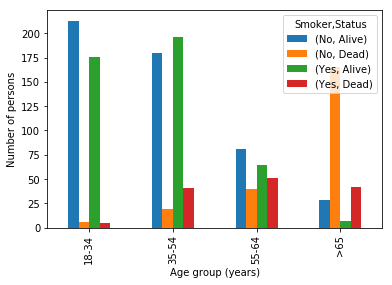

In [20]:
data_cross_age.plot(kind='bar')
plt.ylabel('Number of persons')
plt.xlabel('Age group (years)')
plt.show()

The mortality rate of no smokers at age >65 years is higher than smokers (70% against 30%, IC=95). This paradoxe coule be explained by different size of samples between smokers and no smokers, and other factors like health conditions are not respected in analysis.

### 3. Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

In [21]:
data.loc[data.Status == 'Alive', 'Death']=0
data.loc[data.Status == 'Dead', 'Death']=1
data

Smoker Status   Age AgeGroup  Death
0       Yes  Alive  21.0    18-34    0.0
1       Yes  Alive  19.3    18-34    0.0
2        No   Dead  57.5    55-64    1.0
3        No  Alive  47.1    35-54    0.0
4       Yes  Alive  81.4      >65    0.0
5        No  Alive  36.8    35-54    0.0
6        No  Alive  23.8    18-34    0.0
7       Yes   Dead  57.5    55-64    1.0
8       Yes  Alive  24.8    18-34    0.0
9       Yes  Alive  49.5    35-54    0.0
10      Yes  Alive  30.0    18-34    0.0
11       No   Dead  66.0      >65    1.0
12      Yes  Alive  49.2    35-54    0.0
13       No  Alive  58.4    55-64    0.0
14       No   Dead  60.6    55-64    1.0
15       No  Alive  25.1    18-34    0.0
16       No  Alive  43.5    35-54    0.0
17       No  Alive  27.1    18-34    0.0
18       No  Alive  58.3    55-64    0.0
19      Yes  Alive  65.7      >65    0.0
20       No   Dead  73.2      >65    1.0
21      Yes  Alive  38.3    35-54    0.0
22       No  Alive  33.4    18-34    0.0
23      Yes   Dead  62.3    55-64    1.0
24       No  Alive  18.0    18-34    0.0
25       No  Alive  56.2    55-64    0.0
26      Yes  Alive  59.2    55-64    0.0
27       No  Alive  25.8    18-34    0.0
28       No   Dead  36.9    35-54    1.0
29       No  Alive  20.2    18-34    0.0
...     ...    ...   ...      ...    ...
1284    Yes   Dead  36.0    35-54    1.0
1285    Yes  Alive  48.3    35-54    0.0
1286     No  Alive  63.1    55-64    0.0
1287     No  Alive  60.8    55-64    0.0
1288    Yes   Dead  39.3    35-54    1.0
1289     No  Alive  36.7    35-54    0.0
1290     No  Alive  63.8    55-64    0.0
1291     No   Dead  71.3      >65    1.0
1292     No  Alive  57.7    55-64    0.0
1293     No  Alive  63.2    55-64    0.0
1294     No  Alive  46.6    35-54    0.0
1295    Yes   Dead  82.4      >65    1.0
1296    Yes  Alive  38.3    35-54    0.0
1297    Yes  Alive  32.7    18-34    0.0
1298     No  Alive  39.7    35-54    0.0
1299    Yes   Dead  60.0    55-64    1.0
1300     No   Dead  71.0      >65    1.0
1301     No  Alive  20.5    18-34    0.0
1302     No  Alive  44.4    35-54    0.0
1303    Yes  Alive  31.2    18-34    0.0
1304    Yes  Alive  47.8    35-54    0.0
1305    Yes  Alive  60.9    55-64    0.0
1306     No   Dead  61.4    55-64    1.0
1307    Yes  Alive  43.0    35-54    0.0
1308     No  Alive  42.1    35-54    0.0
1309    Yes  Alive  35.9    35-54    0.0
1310     No  Alive  22.3    18-34    0.0
1311    Yes   Dead  62.1    55-64    1.0
1312     No   Dead  88.6      >65    1.0
1313     No  Alive  39.1    35-54    0.0

[1314 rows x 5 columns]

In [22]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


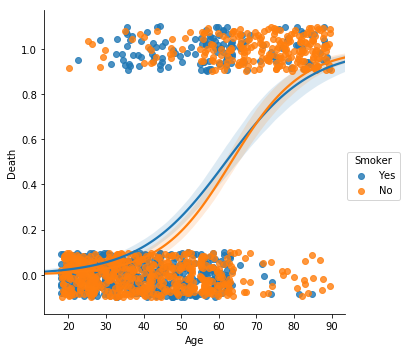

In [23]:
sns.lmplot(x="Age", y="Death",hue="Smoker", data=data, logistic=True, y_jitter=.1)
plt.show()

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [25]:
formula=('Death~Smoker+AgeGroup')
model=logit(formula=formula, data=data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.364541
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1309
Method:                           MLE   Df Model:                            4
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.3860
Time:                        20:58:25   Log-Likelihood:                -479.01
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                4.919e-129
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7947      0.321    -11.809      0.000      -4.425      -3.165
Smoker[T.Yes]         0.4528      0.176      2.577      0.010       0.108       0.797
AgeGroup[T.35-54]     1.6950      0.336      5.039      0.000       1.036       2.354
AgeGroup[T.55-64]     3.1024      0.334      9.279      0.000       2.447       3.758
AgeGroup[T.>65]       5.4917      0.364     15.104      0.000       4.779       6.204
=====================================================================================
"""

The results show that smoking has an influence in women mortality (p-value < 0,05) but age seems to be a better explicatif factor of mortality in different age groups (p-value <<< 0,05). Only 39 % (Pseudo R-sqaured = 0,3860) of mortality can be explained by smoking and age group.